#set z    = <   0.05  0.15  0.25  0.35  0.45  0.55  0.75>
#set m500 = <  2.402 3.831 5.028 5.577 6.206 6.257 6.473 >

set z    = < .01 .025 0.05  0.1 0.15  0.2  0.3  0.4  0.5  0.6  0.7 0.8   0.9   1.0 >
set yval = < 4.0 3.30 2.75 2.16 1.78 1.54 1.20 1.00 0.87 0.78 0.73 0.714 0.69 0.684> 

print {z yval}

set m500 = 10*10**(-yval/3.34)

set zsp = 0,1.0,0.01

spline z m500 zsp msp


########## Page 3
#print {zsp msp}

#
#  Now plot L_X
#

erase
expand 1.25

location 7500 29000 5000 16000

#
# Vikhlinin
#
define h (0.7)                                                                                                                                                       
define omegam (0.30)                                                                                                                                                 
define omegal (0.70)                                                                                                                                                 
set eofz = sqrt ( $omegam * (1+zsp)**3 + $omegal )                                                                                                                   
                                                                                                                                                                     
#                                                                                                                                                                    
#  m5c is M_500 critical and lnx is ln(L_X/1e40 erg/s)                                                                                                               
#     ln(1e44) = 92.1034037                                                                                                                                          
#                                                                                                                                                                    
set m5c = msp * 1e14

set lnx = 47.392 + 1.61 * ln(m5c) - 92.1034037 + 1.850*ln(eofz) - 0.39*ln($h/0.72) #-92 is for the single precision
set lx = exp(lnx)/1.e4

#print {zsp lnx lx m5c}

define _xl 0
define _xh 1
define _yl (lg(0.03))
define _yh (lg(10))

limits $_xl $_xh $_yl $_yh
ticksize 0 0 -1 0
box
xlabel redshift
ylabel L_X [10^{44} erg s^{-1}]

#set xp = t
#set yp = lg(m500)
#
#expand 2.5
#points xp yp

set xp = zsp
set yp = lg(lx)
connect xp yp

expand 1.25
location 7500 29000 20000 31000

define _xl (lg(0.01))
define _xh (lg(1))
define _yl (lg(0.03))
define _yh (lg(10))

limits $_xl $_xh $_yl $_yh
ticksize -1 0 -1 0
box
xlabel redshift
ylabel L_X [10^{44} erg s^{-1}]

#set xp = lg(z)
#set yp = lg(m500)
#
#expand 2.5
#points xp yp

set xp = lg(zsp)
set yp = lg(lx)
connect xp yp

location 3500 31000 3500 31000
expand 1.0


In [9]:
%matplotlib notebook
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from astropy.cosmology import LambdaCDM
from astropy.table import Table

In [10]:
# read in the catalog
xray_data = Table.read('results_table_full.fits')
print(xray_data.columns)
print(xray_data['REDSHIFT'])
print(xray_data['LUM'])

<TableColumns names=('NAME','RA_detc','DEC_detc','REDSHIFT','INDEX','PSZ_dist','EXPTIME','SN','CHI2','FLUX','CNT_RATE_NET','CNT_RATE_MODEL','ECF','LUM','FLUX_corr','LUM_corr','CORR')>
      REDSHIFT     
-------------------
 0.2840000092983246
               0.23
               0.23
 0.1940000057220459
              0.136
              1e+20
              1e+20
              1e+20
 0.0989999994635582
              1e+20
                ...
              1e+20
              1e+20
 0.2193918228149414
0.06199999898672104
              1e+20
              1e+20
0.20000000298023224
0.20000000298023224
 0.1785999983549118
0.14959999918937683
0.14959999918937683
Length = 467 rows
   LUM    
----------
1.2434e+44
2.4421e+41
5.7253e+41
1.2305e+44
7.8154e+43
 7.229e+43
2.0091e+42
2.9792e+42
1.3677e+43
8.5033e+42
       ...
 2.294e+43
2.2884e+43
7.1836e+43
2.0474e+43
8.2861e+42
7.5601e+44
8.1737e+43
4.5682e+42
1.3164e+44
1.8921e+42
9.9806e+43
Length = 467 rows


In [11]:
# Data points and fitting to the Planck mass threshold
x = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.75])
y = np.array([2.402, 3.831, 5.028, 5.577, 6.206, 6.257, 6.473])*1e14
fspline = interp1d(x, y, kind='cubic')
flinear = interp1d(x, y, kind='linear')
# Redshift array
zarr = np.linspace(0.05, 0.75, num=20, endpoint=True)

<IPython.core.display.Javascript object>


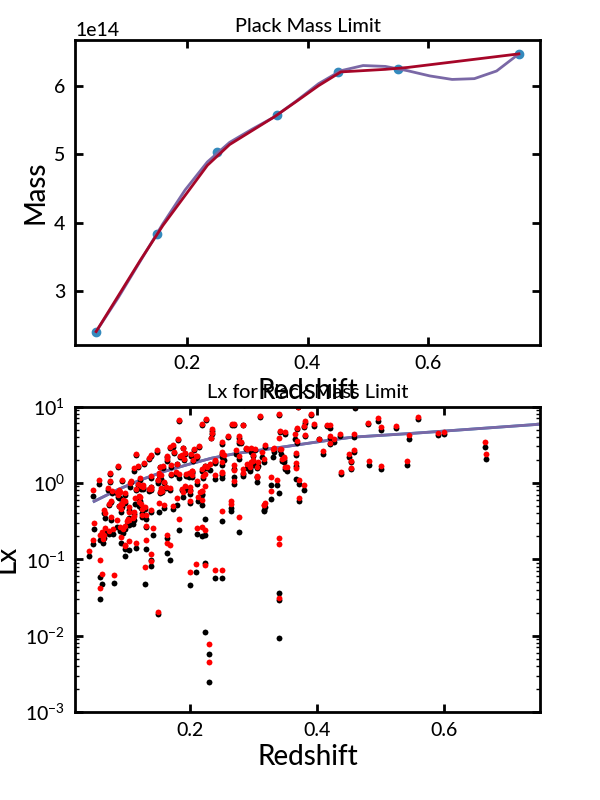

In [23]:
# Plot the interpolations
fig = plt.figure(figsize=(6,8))
fig.subplots_adjust(top=0.95)
ax1 = fig.add_subplot(211)
ax1.set_xlabel('Redshift')
ax1.set_ylabel('Mass')
ax1.set_title('Plack Mass Limit')

ax1.plot(x,y,'o')
ax1.plot(zarr, fspline(zarr))
ax1.plot(zarr, flinear(zarr))

In [25]:
# Define the cosmology
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7, Tcmb0=2.725)
h = cosmo.H0.value/100

m5c = flinear(zarr)
lnLx = 47.392 + 1.61 * np.log(m5c) + 1.850*np.log(cosmo.efunc(zarr)) - 0.39*np.log(h/0.72)
Lx = np.exp(lnLx)

ax2 = fig.add_subplot(212)
ax2.set_xlabel('Redshift')
ax2.set_ylabel('Lx')
plt.yscale('log')
ax2.set_title('Lx for Plack Mass Limit')
ax2.plot(zarr, Lx/1e44)
ax2.plot(xray_data['REDSHIFT'], xray_data['LUM']/1e44, 'k.')
ax2.plot(xray_data['REDSHIFT'], xray_data['LUM_corr']/1e44, 'r.')
ax2.set_xlim(0.02,0.75)
# ax2.set_ylim(9e41,3e45)
ax2.set_ylim(0.001, 10)
# plt.savefig("Lx-z.png")
# plt.show()

/home/boada/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


(0.001, 10)